In [56]:
reset()

In [57]:
%display latex

In [58]:
M=Manifold(4,"M")

In [59]:
XS.<t,r,th,ph> = M.chart(r't r:(0,+oo) th:(0,pi):\theta ph:(0,2*pi):\phi')

In [60]:
T = M.affine_connection('T',"T")

In [61]:
m=var("m")
T[0,0,0] = 0
T[0,0,1] =-(m/(2* m* r-r^2))
T[0,1,0]= T[0,0,1]
T[0,1,1] = 0
T[0,2,2] =0
T[0,3,3] = 0
T[1,0,0] = (m* (-2* m+r))/r^3
T[1,0,1] = 0
T[1,1,1] =-T[0,0,1]
T[1,2,2] =2*m-r
T[1,3,3] = (2*m-r)*(sin(th))^2
T[2,0,2] = 0
T[2,0,3] = 0
T[2,1,2] =1/r
T[2,2,1]=T[2,1,2]
T[2,1,3] = 0
T[2,3,3] = -cos(th)*sin(th)
T[3,0,2] = 0
T[3,0,3] = 0
T[3,1,2] = 0
T[3,1,3] = 1/r
T[3,3,1]=T[3,1,3]
T[3,2,3] = cos(th)/sin(th)
T[3,3,2]=T[3,2,3]

In [62]:
Riem= T.riemann()

In [63]:
Riem.display_comp(only_nonredundant=True)

X^t_r,t,r = -2*m/(2*m*r^2 - r^3) 
X^t_th,t,th = -m/r 
X^t_ph,t,ph = -m*sin(th)^2/r 
X^r_t,t,r = -2*(2*m^2 - m*r)/r^4 
X^r_th,r,th = -m/r 
X^r_ph,r,ph = -m*sin(th)^2/r 
X^th_t,t,th = (2*m^2 - m*r)/r^4 
X^th_r,r,th = -m/(2*m*r^2 - r^3) 
X^th_ph,th,ph = 2*m*sin(th)^2/r 
X^ph_t,t,ph = (2*m^2 - m*r)/r^4 
X^ph_r,r,ph = -m/(2*m*r^2 - r^3) 
X^ph_th,th,ph = -2*m/r

In [64]:
Ric = T.ricci()
Ric.display()

0

In [65]:
g = M.lorentzian_metric('g')


In [68]:
g[0,0], g[1,1] =  -function("f")(r), 1/function("f")(r)
g[2,2], g[3,3] = r^2, (r*sin(th))^2

In [77]:
g[0,0], g[1,1] = -1, 1


In [78]:
g.display()

g = -dt⊗dt + dr⊗dr + r^2 dth⊗dth + r^2*sin(th)^2 dph⊗dph

In [79]:
dR=Riem.down(g)

In [80]:
uR=Riem.up(g)

In [81]:
Kr = uR.contract(0, 1, 2, 3, dR, 0, 1, 2, 3)
Kr.expr().factor()

48*(2*m^2 - 2*m*r + r^2)^2*m^2/((2*m - r)^2*r^8)

In [82]:
var("F")
value = r**2 * F**2 + 4*m**2 - 4*m*r + r**2 == 0
solve(value, F)

[F == (2*I*m - I*r)/r, F == (-2*I*m + I*r)/r]

In [83]:
func = Kr.expr().subs(m=1).factor()
func

48*(r^2 - 2*r + 2)^2/((r - 2)^2*r^8)

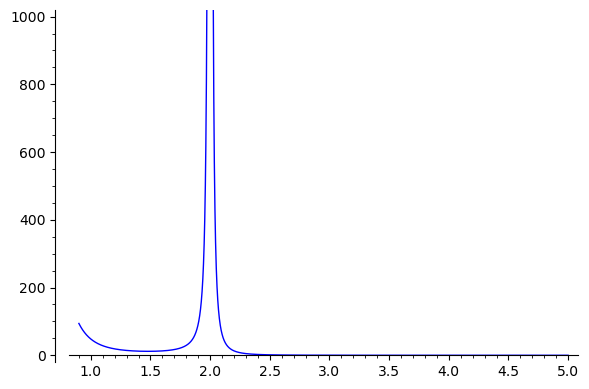

In [84]:
plot(func, r, .9, 5, ymax=1000)